In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection 


In [0]:
df = pd.read_csv('City.csv')
Y=df.iloc[:,0]
X= df.iloc[:,2:]

In [0]:
# Partimos los datos, la mitad para entrenamiento y la otra para test
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [0]:
#Definimos la función que contenga la red neuronal con tres capas de cuatro neuronas cada una y calcule el F1
#p es el porcentaje del número total de datos training
#Las variables que tengan prefijo N no se utilizarán, por otro lado x_Tr y Y_Tr es con lo que entrenaremos la neurona
def get_F1(p, parreg):
  if (p==1):
     x_Tr,x_Te, Y_Tr, Y_Te= x_train, x_test, y_train, y_test
  if (p!=1):
    x_Tr, Nx_Tr, Y_Tr, NY_tr = train_test_split(x_train, y_train, train_size=p)
    x_Te, Nx_Te, Y_Te, NY_te = train_test_split(x_test, y_test, train_size=p)
  if (parreg == 0):
    par_reg='logistic'
  if(parreg == 1):
    par_reg= 'relu'
  mlp = sklearn.neural_network.MLPClassifier(activation=par_reg, 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=2200)
  mlp.fit(x_Tr, Y_Tr)
  return (sklearn.metrics.f1_score(Y_Tr, mlp.predict(x_Tr), average='macro'),sklearn.metrics.f1_score(Y_Te, mlp.predict(x_Te), average='macro'))
  

In [5]:
#Creamos la lista que contendrá F1 softmax y Relu. Las primeras 2 filas son de softmax (training y test). Las filas 3 y 4 son las de Relu
F1=np.zeros((4,10))

#Calculamos F1 para cada caso. Si el 2do parámetro es softmax
for i in range(10):
  para= (i+1)/10
  F1_soft=get_F1(para, 0)
  F1_relu=get_F1(para, 1)
  F1[0,i]= F1_soft[0]
  F1[1,i]= F1_soft[1]
  F1[2,i]= F1_relu[0]
  F1[3,i]= F1_relu[1]

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Text(0.5, 0.98, 'Activadión softmax y ReLU ')

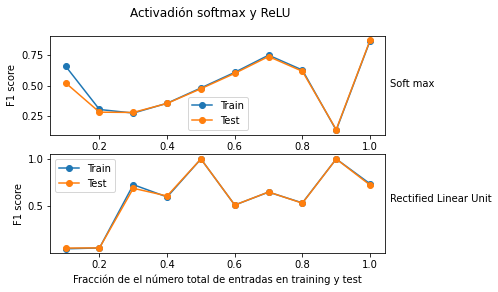

In [6]:
fig, ax = plt.subplots(2,1)
ax[0].plot((np.arange(0,10)+1)/10, F1[0], 'o-', label= 'Train')
ax[0].plot((np.arange(0,10)+1)/10, F1[1], 'o-', label= 'Test')
ax[0].legend()
ax[0].set_xlabel('Fracción de el número total de entradas en training y test')
ax[0].set_ylabel('F1 score')
ax[0].annotate('Soft max ',
            xy=(390, 205), xycoords='figure pixels')
ax[1].plot((np.arange(0,10)+1)/10, F1[2], 'o-', label= 'Train')
ax[1].plot((np.arange(0,10)+1)/10, F1[3], 'o-', label= 'Test')
ax[1].legend()
ax[1].set_xlabel('Fracción de el número total de entradas en training y test')
ax[1].set_ylabel('F1 score')
ax[1].annotate('Rectified Linear Unit ',
            xy=(390, 90), xycoords='figure pixels')
fig.suptitle('Activadión softmax y ReLU ')

Soft Max es mucho más estable tanto para train como para test en su crecimiento. 
Rectified Linear Unit oir su parte es bastante impredescible para las primeras fracciones. Sin embargo el Score de F1 es mejor para RLU.

In [8]:
#Ahora vamos a utilizar Relu variando el parámetro alfa
F1_alpha = np.zeros((3,10))
for i in range(10):
  c= 10**(-4+i*0.8)
  mlp = sklearn.neural_network.MLPClassifier(activation='relu', 
                                           hidden_layer_sizes=(4,4,4), 
                                           max_iter=1500, alpha = c)
  mlp.fit(x_train, y_train)
  F1_alpha[0,i]=(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
  F1_alpha[1,i]=(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
  F1_alpha[2,i]=c


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'F1 score')

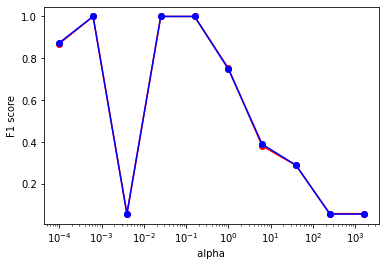

In [14]:
fig, ax = plt.subplots()
ax.semilogx(F1_alpha[2], F1_alpha[0], 'ro-',label= 'Train')
ax.semilogx(F1_alpha[2], F1_alpha[1], 'bo-',label= 'Test')
ax.set_xlabel(' alpha ')
ax.set_ylabel('F1 score')


El  parámetro $\alpha$ alcanza un valor óptimo para F1 entre [0.1, 1]$. a partir de allí cae rapidamente a un valor menor de 0.1 

# Conclusiones

1. La activación softmax nos da valores de F1 más a constantes para proporciones de los datos
en training y test a comparación de Rectified Linear Unit.
2. La activación Rectified Linear Unit es más variable, pero F1 converge más rapidamente a 1 que
softmax, inclusive, no es posible decir que para este último se presente esto.
3. Como era de esperarse es mejor tener un número mayor de datos con que entrenar y testear la red.
4. Inexplicablemente para mí tanto en training como en test se presentan F1 score muy cercanos entre sí.
5. El parámetro $\alpha$ no debería estar por encima de 1, pues el F1 score decae a aproximadamente 0.
6. El parámetro $\alpha$ puede variar F1 entre 0.5 a 1, lo que quiere decir que la penalidad es importante para nuestras predicciones.